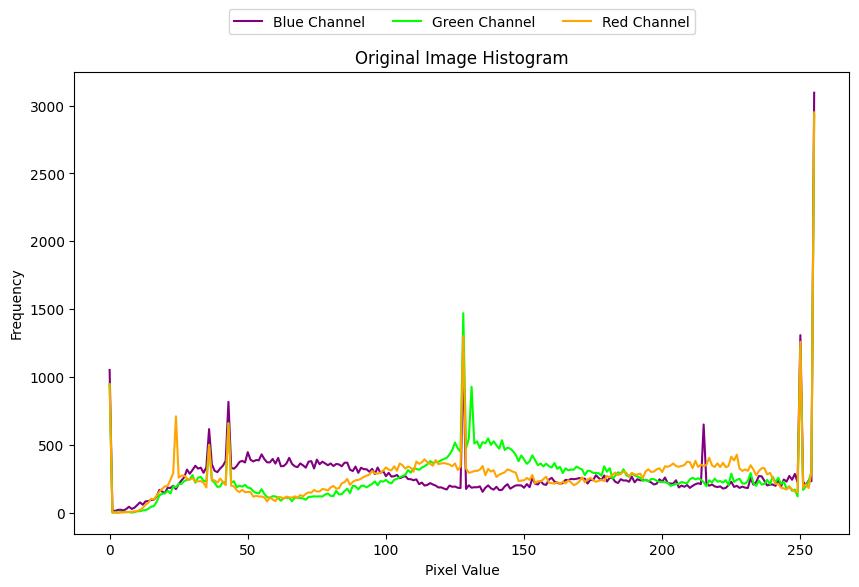

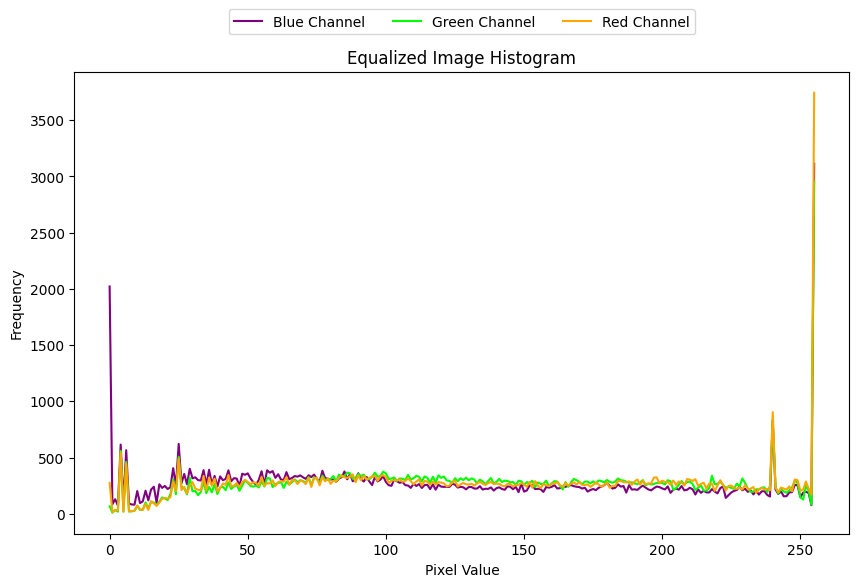

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_histogram(image, title):
    plt.figure(figsize=(10, 6))
    
    for i, col in enumerate(['purple', 'lime', 'orange']):
        plt.plot(cv2.calcHist([image], [i], None, [256], [0, 256]), color=col)
    
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(['Blue Channel', 'Green Channel', 'Red Channel'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    plt.show()

def apply_histogram_equalization(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    equalized_l = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)).apply(lab_image[:, :, 0])
    equalized_image = cv2.cvtColor(cv2.merge([equalized_l, lab_image[:, :, 1], lab_image[:, :, 2]]), cv2.COLOR_LAB2BGR)
    return equalized_image

if __name__ == "__main__":
    image_path, original_image = r'target.png', cv2.imread(r'target.png')

    plot_histogram(original_image, "Original Image Histogram")
    
    equalized_image = apply_histogram_equalization(original_image)
    
    plot_histogram(equalized_image, "Equalized Image Histogram")
    
    cv2.imshow("Original Image", original_image)
    cv2.imshow("Equalized Image", equalized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
